In [1]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

#from helper2 import generate_dataset, visualize_one_dataset, visualize_datasets, predict_grid, visualize_predictions
from torch.utils import data

%load_ext autoreload
%autoreload 2

import torchvision

from time import time
from torchvision import datasets, transforms
from torch import nn, optim

from helpers_opt_parameters_Fashion_CNN_mini import *
#from sdlbfgs import *

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### FashionMNIST dataset
The MNIST dataset is loaded.

In [3]:
trainset = datasets.FashionMNIST('', download=True, train=True, transform=transform)
valset = datasets.FashionMNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)

In [4]:
print("Training and test sets information is displayed.\n\n")
print("Trainset:\n",trainset)
print("Testset:\n",valset)

Training and test sets information is displayed.


Trainset:
 Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Testset:
 Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: PATH_TO_STORE_TESTSET
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


# LBFGS mini-batch hyperparameters tuning 



In [7]:
minibatch_size_grid=[32,64]
max_iter = 3
history_size_grid=[10,20]

In [8]:
epochs = 15

### Convolutional neural network

In [9]:
training_loss_fcnn, test_loss_fcnn,training_accuracy_fcnn, test_accuracy_fcnn, time_fcnn =hyperparameters_tuning_LBFGS_minibatch(trainset,valset,minibatch_size_grid, history_size_grid, max_iter,epochs, "CNN")

Minibatch size:  32
History size:  10
Epoch 0


KeyboardInterrupt: 

In [15]:
np.savetxt('1/LBFGS_minibatch_fcNN_trainloss.txt', training_loss_fcnn)
np.savetxt('1/LBFGS_minibatch_fcNN_testloss.txt', test_loss_fcnn)
np.savetxt('1/LBFGS_minibatch_fcNN_trainacc.txt', training_accuracy_fcnn)
np.savetxt('1/LBFGS_minibatch_fcNN_testacc.txt', test_accuracy_fcnn)
np.savetxt('1/LBFGS_minibatch_fcNN_times.txt',time_fcnn)

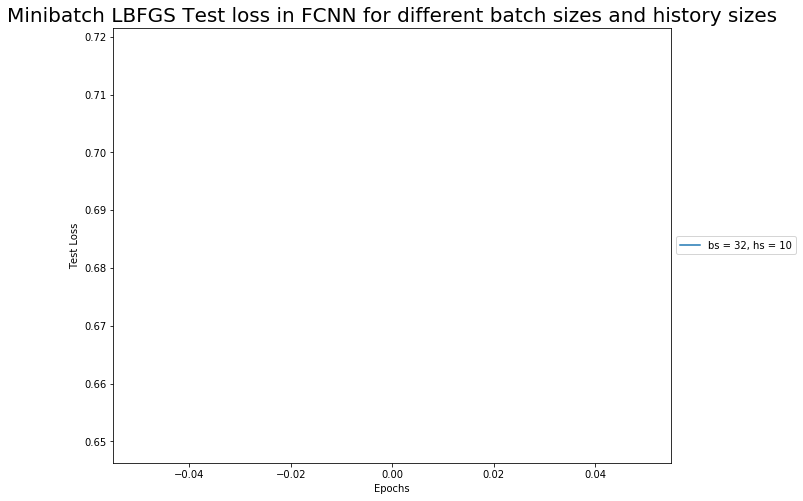

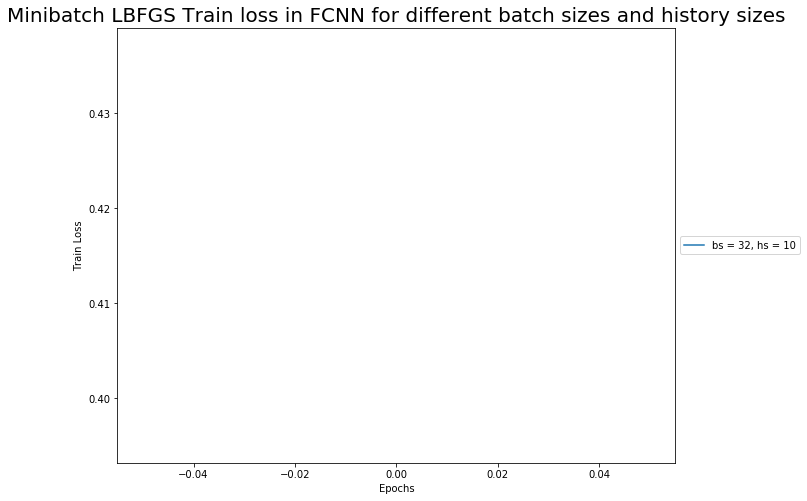

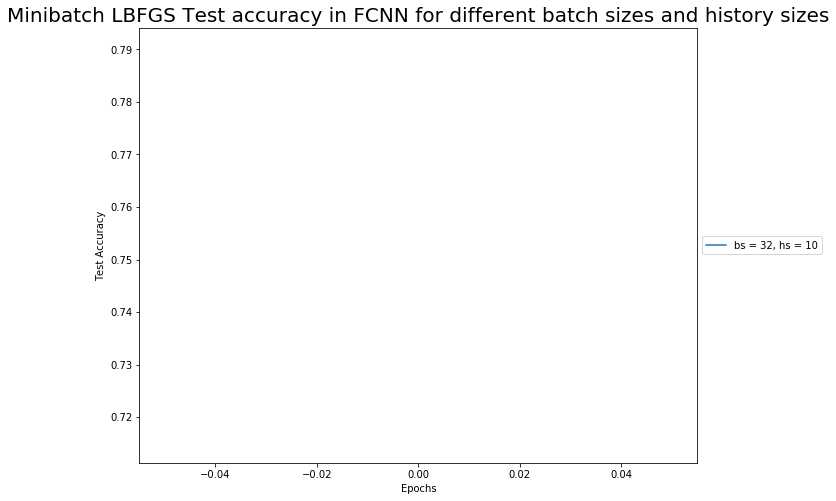

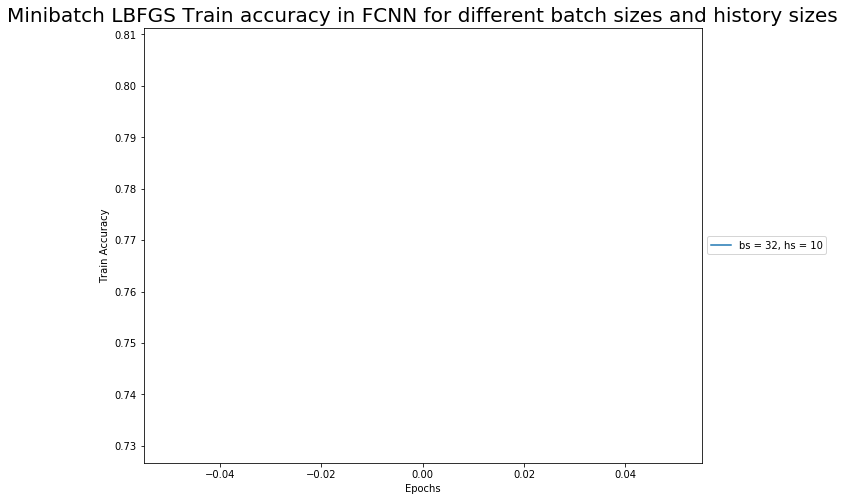

In [16]:
i = 0
for bs_index,bs in enumerate(minibatch_size_grid):
    for hs_index,hs in enumerate(history_size_grid):
        plt.figure(1, figsize = (10,8))
        plt.plot(test_loss_fcnn[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(2, figsize = (10,8))
        plt.plot(training_loss_fcnn[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(3, figsize = (10,8))
        plt.plot(test_accuracy_fcnn[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(4, figsize = (10,8))
        plt.plot(training_accuracy_fcnn[i],label='bs = {}, hs = {}'.format(bs,hs))
        i+=1

plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Minibatch LBFGS Test loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("1/mini_LBFGS_test_loss_fcnn.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Minibatch LBFGS Train loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("1/mini_LBFGS_train_loss_fcnn.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Minibatch LBFGS Test accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("1/mini_LBFGS_test_acc_fcnn.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Minibatch LBFGS Train accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("1/mini_LBFGS_train_acc_fcnn.jpg")

In [11]:
minibatch_size_grid = [512,1024]
max_iter=20
epochs=30
history_size_grid=[10,20]

In [12]:
training_loss_fcnn2, test_loss_fcnn,training_accuracy_fcnn2, test_accuracy_fcnn2, time_fcnn2 = hyperparameters_tuning_LBFGS_minibatch(trainset,valset,minibatch_size_grid, history_size_grid, max_iter,epochs, "FCNN2")

er Of Images Tested = 10000
Model Accuracy = 0.8449
Number Of Images Tested = 60000
Model Accuracy = 0.8936833333333334
Test loss: 0.9244325578212738 

Epoch 20
Training loss: 0.02010934165668066
Number Of Images Tested = 10000
Model Accuracy = 0.8578
Number Of Images Tested = 60000
Model Accuracy = 0.9125
Test loss: 0.8757004350423813 

Epoch 21
Training loss: 0.023339608906160533
Number Of Images Tested = 10000
Model Accuracy = 0.8641
Number Of Images Tested = 60000
Model Accuracy = 0.9132166666666667
Test loss: 0.9031147122383117 

Epoch 22
Training loss: 0.018675451732232725
Number Of Images Tested = 10000
Model Accuracy = 0.8522
Number Of Images Tested = 60000
Model Accuracy = 0.89725
Test loss: 1.1057883650064468 

Epoch 23
Training loss: 0.020393324277947766
Number Of Images Tested = 10000
Model Accuracy = 0.8322
Number Of Images Tested = 60000
Model Accuracy = 0.8816166666666667
Test loss: 1.164578777551651 

Epoch 24
Training loss: 0.020537118629702384
Number Of Images Tested 

In [13]:
np.savetxt('Fashion_LBFGS_minibatch_CNN_trainloss.txt', training_loss_fcnn2)
np.savetxt('Fashion_LBFGS_minibatch_CNN_testloss.txt', test_loss_fcnn)
np.savetxt('Fashion_LBFGS_minibatch_CNN_trainacc.txt', training_accuracy_fcnn2)
np.savetxt('Fashion_LBFGS_minibatch_CNN_testacc.txt', test_accuracy_fcnn2)
np.savetxt('Fashion_LBFGS_minibatch_CNN_times.txt',time_fcnn2)

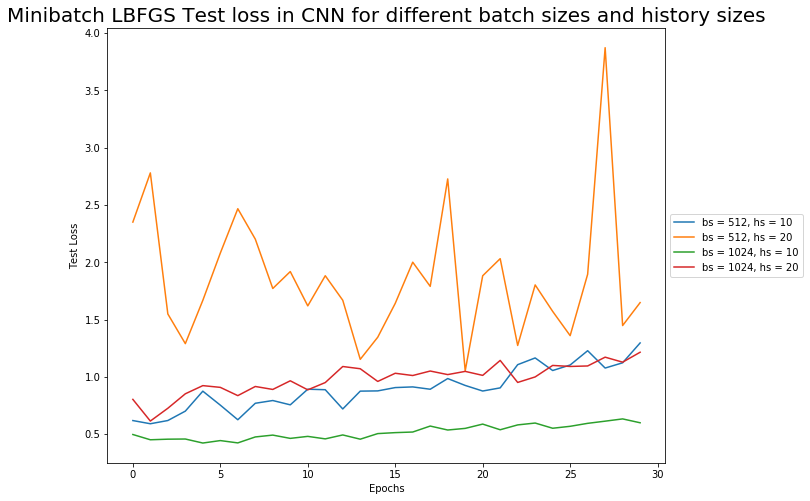

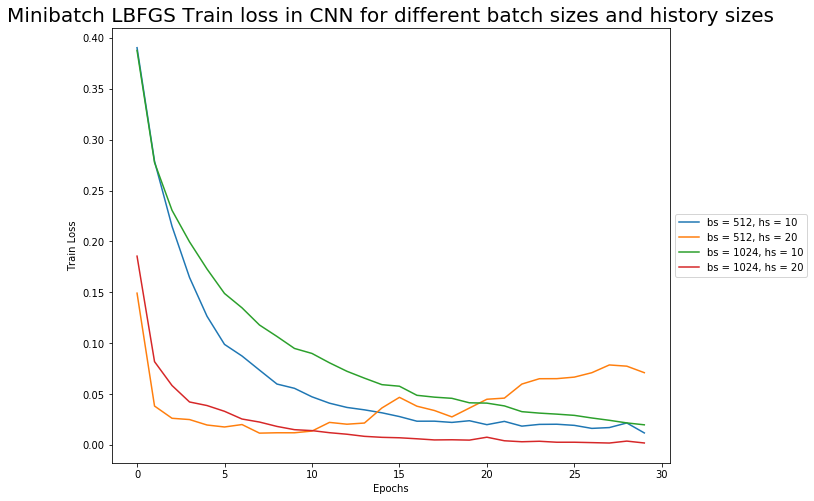

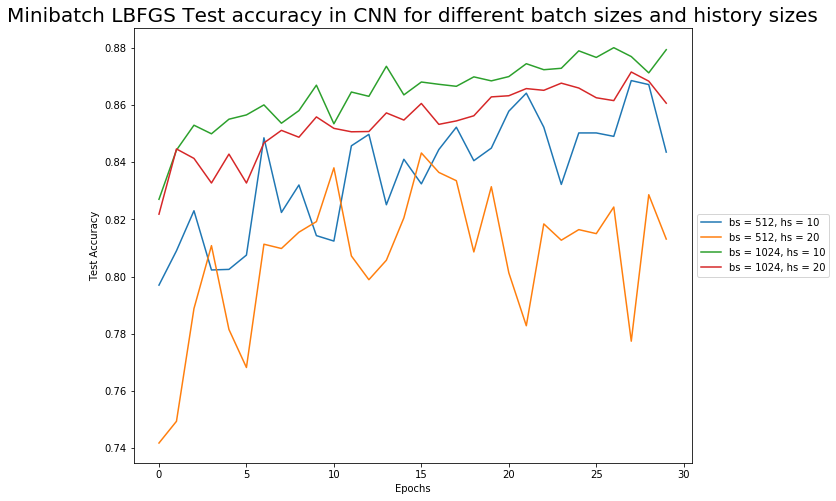

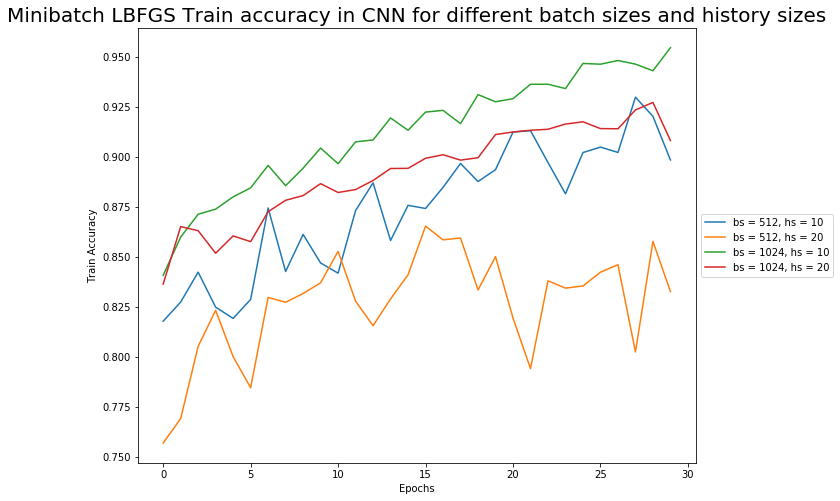

In [16]:
i = 0
for bs_index,bs in enumerate(minibatch_size_grid):
    for hs_index,hs in enumerate(history_size_grid):
        plt.figure(1, figsize = (10,8))
        plt.plot(test_loss_fcnn[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(2, figsize = (10,8))
        plt.plot(training_loss_fcnn2[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(3, figsize = (10,8))
        plt.plot(test_accuracy_fcnn2[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(4, figsize = (10,8))
        plt.plot(training_accuracy_fcnn2[i],label='bs = {}, hs = {}'.format(bs,hs))
        i+=1

plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Minibatch LBFGS Test loss in CNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Fashion_LBFGS_minibatch_CNN_test_loss.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Minibatch LBFGS Train loss in CNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Fashion_LBFGS_minibatch_CNN_train_loss.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Minibatch LBFGS Test accuracy in CNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Fashion_LBFGS_minibatch_CNN_test_acc.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Minibatch LBFGS Train accuracy in CNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Fashion_LBFGS_minibatch_CNN_train_acc.jpg")